In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score

Loading Housing Prices Dataset
and Display Dataset

In [62]:
url = 'https://raw.githubusercontent.com/sorif95/ML-Assignment/main/Housing.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             523 non-null    float64
 1   area              491 non-null    float64
 2   bedrooms          491 non-null    float64
 3   bathrooms         491 non-null    float64
 4   stories           491 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           491 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  price_category    545 non-null    int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 59.7+ KB


Total count of missing values per column

In [63]:
df.isnull().sum()


,0
price,22
area,54
bedrooms,54
bathrooms,54
stories,54
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Preprocess the dataset

In [64]:
# Handle missing values
knn_imputer = KNNImputer(n_neighbors=5)
df['price'].fillna(df['price'].mean(), inplace=True)
df['area'].fillna(df['area'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
df['bathrooms'] = knn_imputer.fit_transform(df[['bathrooms']])
df['stories'].fillna(df['stories'].median(), inplace=True)
df['parking'].fillna(df['parking'].mode()[0], inplace=True)

<ipython-input-64-c7aadbdc99c2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)
<ipython-input-64-c7aadbdc99c2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [65]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [66]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Convert 'parking' into binary classification
df['parking_binary'] = df['parking'].apply(lambda x: 0 if x <= 1 else 1)

In [67]:
# Define features and targets
X = df.drop(columns=['price', 'parking_binary'])  # Features
y_classification = df['parking_binary']  # Classification target
y_regression = df['price']  # Regression target

# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

Model Training

In [71]:
# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = knn_classifier.predict(X_test_cls)

# Classification Metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_cls):.2f}")
print(f"Precision: {precision_score(y_test_cls, y_pred_cls):.2f}")
print(f"Recall: {recall_score(y_test_cls, y_pred_cls):.2f}")
print(f"F1-score: {f1_score(y_test_cls, y_pred_cls):.2f}")

Classification Metrics:
Accuracy: 0.89
Precision: 0.93
Recall: 0.54
F1-score: 0.68


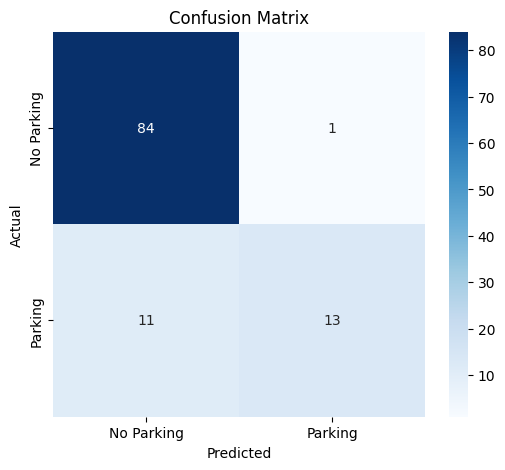

In [69]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues', xticklabels=["No Parking", "Parking"], yticklabels=["No Parking", "Parking"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
# Train KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_reg)

# Regression Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)
print("Regression Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.2f}")

Regression Metrics:
MSE: 0.49
RMSE: 0.70
R² score: 0.64


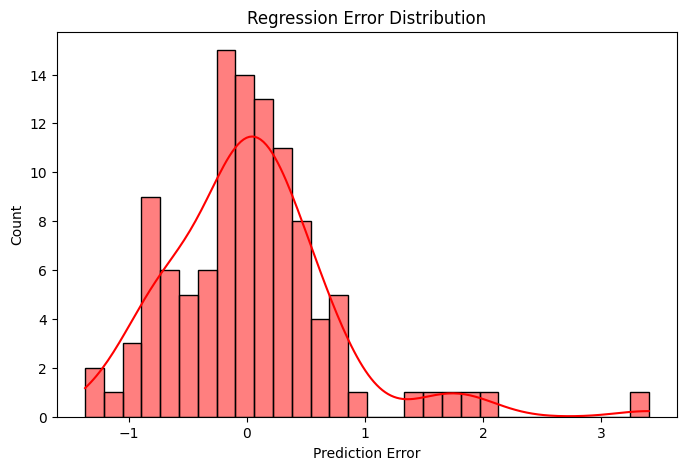

In [73]:
# Error Distribution Visualization
plt.figure(figsize=(8,5))
sns.histplot(y_test_reg - y_pred_reg, bins=30, kde=True, color='red')
plt.title("Regression Error Distribution")
plt.xlabel("Prediction Error")
plt.show()